In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

2025-03-02 16:11:59.650110: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class DatasetConfig:
    DATA_PATH = 'dataset'
    TRAIN_CSV = os.path.join(DATA_PATH, 'train.csv')
    TEST_CSV = os.path.join(DATA_PATH, 'test.csv')
    IMAGE_SIZE = (128, 128)
    BATCH_SIZE = 32
    EPOCHS = 10
    MODEL_FILE = 'AI-vs-Human-Classifier.h5'

In [3]:
train_df = pd.read_csv(DatasetConfig.TRAIN_CSV)
test_df = pd.read_csv(DatasetConfig.TEST_CSV)


In [4]:
train_df["file_name"] = train_df["file_name"].apply(lambda x: os.path.join(DatasetConfig.DATA_PATH, x))
train_df = train_df.dropna(subset=["file_name", "label"])
train_df = train_df[train_df["file_name"].apply(os.path.exists)]
train_df["label"] = train_df["label"].astype(str).apply(lambda x: "human" if x.strip() == "0" else "ai")


In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)


In [6]:
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col="file_name",
    y_col="label",
    target_size=DatasetConfig.IMAGE_SIZE,
    batch_size=DatasetConfig.BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_generator = datagen.flow_from_dataframe(
    train_df,
    x_col="file_name",
    y_col="label",
    target_size=DatasetConfig.IMAGE_SIZE,
    batch_size=DatasetConfig.BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

Found 71955 validated image filenames belonging to 2 classes.
Found 7995 validated image filenames belonging to 2 classes.


In [7]:
if train_generator.n == 0 or val_generator.n == 0:
    raise ValueError("Error: Training or validation generator is empty. Check dataset paths and labels.")


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/Users/prathamsharma/Desktop/Projects/AI-vs-Human/generated-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])


In [10]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=DatasetConfig.EPOCHS
)


/Users/prathamsharma/Desktop/Projects/AI-vs-Human/generated-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2249/2249 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.8550 - loss: 0.3753

/Users/prathamsharma/Desktop/Projects/AI-vs-Human/generated-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2249/2249 ━━━━━━━━━━━━━━━━━━━━ 1525s 676ms/step - accuracy: 0.8550 - loss: 0.3753 - val_accuracy: 0.9158 - val_loss: 0.2124
Epoch 2/10
2249/2249 ━━━━━━━━━━━━━━━━━━━━ 1567s 697ms/step - accuracy: 0.9097 - loss: 0.2382 - val_accuracy: 0.9248 - val_loss: 0.1976
Epoch 3/10
2249/2249 ━━━━━━━━━━━━━━━━━━━━ 1534s 682ms/step - accuracy: 0.9205 - loss: 0.2074 - val_accuracy: 0.9318 - val_loss: 0.1748
Epoch 4/10
2249/2249 ━━━━━━━━━━━━━━━━━━━━ 1531s 681ms/step - accuracy: 0.9307 - loss: 0.1859 - val_accuracy: 0.9413 - val_loss: 0.1605
Epoch 5/10
2249/2249 ━━━━━━━━━━━━━━━━━━━━ 1519s 676ms/step - accuracy: 0.9365 - loss: 0.1730 - val_accuracy: 0.9497 - val_loss: 0.1404
Epoch 6/10
2249/2249 ━━━━━━━━━━━━━━━━━━━━ 1475s 656ms/step - accuracy: 0.9383 - loss: 0.1677 - val_accuracy: 0.9542 - val_loss: 0.1276
Epoch 7/10
2249/2249 ━━━━━━━━━━━━━━━━━━━━ 1589s 706ms/step - accuracy: 0.9415 - loss: 0.1573 - val_accuracy: 0.9557 - val_loss: 0.1245
Epoch 8/10
2249/2249 ━━━━━━━━━━━━━━━━━━━━ 1830s 813ms/step - accur

In [11]:
model.save(DatasetConfig.MODEL_FILE)

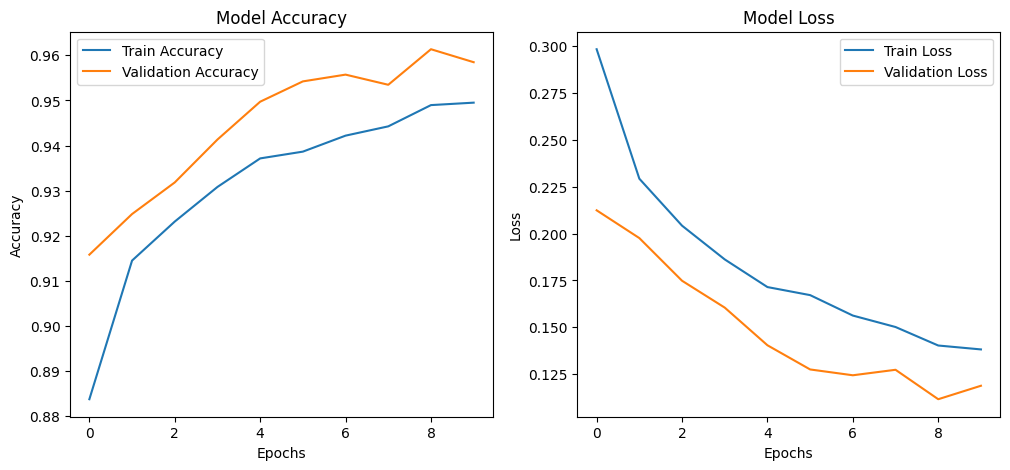

In [12]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

plot_training_history(history)

In [18]:
test_df['id'] = test_df['id'].apply(lambda x: os.path.join(DatasetConfig.DATA_PATH, x))
test_df = test_df[test_df['id'].apply(os.path.exists)]

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col = 'id',
    target_size = DatasetConfig.IMAGE_SIZE,
    batch_size = DatasetConfig.BATCH_SIZE,
    class_mode = None,
    shuffle = False
)

Found 5540 validated image filenames.


In [20]:
if test_generator.n == 0:
    raise ValueError('Error : Test generator is empty.')

In [21]:
test_predictions = model.predict(test_generator)
test_df['prediction'] = (test_predictions > 0.5).astype(int)

/Users/prathamsharma/Desktop/Projects/AI-vs-Human/generated-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


174/174 ━━━━━━━━━━━━━━━━━━━━ 147s 846ms/step


In [22]:
test_df.to_csv('test_predictions.csv', index=False)
print('Predictions saved to test_predictions.csv')

Predictions saved to test_predictions.csv


In [25]:
def predict_image(image_path, model_path=DatasetConfig.MODEL_FILE):
    model = tf.keras.models.load_model(model_path)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=DatasetConfig.IMAGE_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    return 'AI-Generated' if prediction > 0.5 else 'Human-Generated'

In [29]:
if not test_df.empty:
    sample_image = test_df.iloc[2]['id']
    print(f'Prediction for sample image : {predict_image(sample_image)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Prediction for sample image : AI-Generated
